In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tradebot1 import *
#import backtrader as bt
import warnings
warnings.filterwarnings("ignore")

In [52]:
import yfinance as yf
from tradebot1 import EMA, RD, MA

### Why stock price goes down?
- (short-term price is higher than long-term price) and (short-term price is converging to long-term price)
  - short-term price: 
    - NASDAQ EMA over 12 days
  - long-term price:
    - NASDAQ EMA OVER 26 days

- the overall economy is shrinking
  - VIX

### total factors of price up and down?

- vergence factor
  - absolute short-term price vs absolute long-term price
    - convergence or divergence?
- economy factor
  - overall economy trend





financial meaning of indicator:
- EMA of price (MA): denoised ?-term price
- Dif of MA_short and MA_long (Dif): diviation of short-term price w.r.t. long-term price
- MA of Dif (MA_DIF): "Longer-term" diviation
- Dif of Dif (Slope_Dif): change of diviation
  - if slope getting 
- (dif - ma_dif)
  - diviation of (long_term diviation and short_term diviation)
- self dif (dif - ma_dif)
  - change of ...
  - if the absolute value of this value gets smaller, means the short-term diviation will converge into long-term diviation

### Why you earn?
- based on the 2 factors, judge how likely the stock price is going up / down in nearby days
  - then, follow the momentum.

### create 3 indicators
- long-term and short-term abosolute level compasition
  - short-term is higher/lower than long-term?
  - EMA_short - EMA_long
- -vergence trend
  - converge or diverge
  - 

Delta divergence = 多头势力 - 空头势力 = 净多头势力


Some rules of computation:
- dif 就是 一阶导数  = 斜率
  - 因为 没有 x
- MA = denoised， 但是 增加 滞后性
  - it is a trade-off betw 错误性 和 滞后性
  - key hyperparameter！！！！！

  




In [53]:
# def lookup(date_pd_series, format=None):
#     """
#     This is an extremely fast approach to datetime parsing.
#     For large data, the same dates are often repeated. Rather than
#     re-parse these, we store all unique dates, parse them, and
#     use a lookup to convert all dates.
#     """
#     dates = {date:pd.to_datetime(date, format=format) for date in date_pd_series.unique()}
#     return date_pd_series.map(dates)


In [54]:
# def create_data(tiker='^IXIC', period ='6mo', which='Open', interval='1d'):
#     '''
#     # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#     # Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#     '''
#     def reformulate_date(df):
#         df.columns = df.columns.map(''.join)
#         df = df.rename_axis('Date').reset_index()
#         return df
#     yt = yf.Ticker(tiker)
#     # 
#     data = yt.history(period=period, interval=interval) 
#     data['pct_change'] = data[which].pct_change()
#     data['log_ret'] = np.log(data[which]) - np.log(data[which].shift(1))
#     data = reformulate_date(data)
#     print("most recent date is ", data.iloc[-1, 0])
#     return data
    

In [55]:
# def get_data(tiker='^IXIC', start="2022-05-05", end="2022-05-06", which='Close', interval='1m'):
#     '''
#     # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#     # Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#     # see https://github.com/ranaroussi/yfinance/blob/9eef951acc70121e65825ad25e7afd2edd4c3e4b/yfinance/multi.py
#     '''
#     def reformulate_date(df):
#         df.columns = df.columns.map(''.join)
#         df = df.rename_axis('Date').reset_index()
#         return df
#     data = yf.download(tickers = tiker, start=start, end=end, interval = interval)
#     data['pct_change'] = data[which].pct_change()
#     data['log_ret'] = np.log(data[which]) - np.log(data[which].shift(1))
#     data = reformulate_date(data)
#     #print("most recent date is ", data.iloc[-1, 0])
#     return data

In [56]:
# def my_dif(data):
#     later_1day = data[1:]
#     before_1day = data[:-1]
#     return later_1day - before_1day

In [57]:
# def compute_plot2(ori_data, short, long, span, smooth_factor1=12, smooth_factor2 = 3, if_plot = False, focal_row_nums=[]):
#     '''
#     Input:
#         ori_data:
#             - array
#         short
#             - day
        
#     output:
#         3 array
#             - same length
#     '''
#     figure_size = (10, 5)
#     focal_row_nums = focal_row_nums
    
    
#     EMA_short, EMA_long, dif, _, macd = MACD(ori_data, SHORT=short, LONG=long, M=span)
    
#     ma_dif = RD(EMA(my_dif(EMA(ori_data, smooth_factor1)), smooth_factor2))
#     #dif_madif =  my_dif(ma_dif)
    
#     if if_plot:
#         fig, ax = plt.subplots(figsize=figure_size)
#         ax.plot(ori_data, label="Price")
#         for focal_row_num in focal_row_nums:
#             ax.vlines(ymin=np.min(ori_data), ymax=np.max(ori_data), x=focal_row_num, color='r', linestyle='-.')
#         ax.legend()
        
        
        
#         # fig, ax = plt.subplots(figsize=figure_size)
#         # ax.plot(EMA_short, label="EMA_short: short-term price")
#         # ax.plot(EMA_long, label="EMA_long: long-term price")
#         # #ax.plot(macd, label="macd")
#         # ax.legend()   
        

        
#         fig, ax = plt.subplots(figsize=figure_size)
#         #ax.plot(dif, label="dif: divergence")
#         ax.hlines(xmin=0, xmax=dif.shape[0], y = 0, color='r', linestyle='-.')
#         #assert dif.shape[0] == ori_data.shape[0] == ma_dif.shape[0]
#         for focal_row_num in focal_row_nums:
#             ax.vlines(ymin=np.min(dif), ymax=np.max(dif), x=focal_row_num, color='r', linestyle='-.')
#         ax.plot(ma_dif, label="MA of delta price: denoised(smoothed) divergence; 有更高的滞后性")
#         #ax.plot(macd, label="macd")
#         ax.legend()
        

#         # fig, ax = plt.subplots(figsize=figure_size)
#         # ax.hlines(xmin=0, xmax=dif.shape[0], y = 0, color='r', linestyle='-.')
#         # ax.plot(macd, label="MACD")
#         # ax.legend()  
        
#         # dif_dif = my_dif(dif)
        
#         # #assert dif.shape[0] == dif_dif.shape[0] + 1
#         # fig, ax = plt.subplots(figsize=figure_size)
#         # ax.hlines(xmin=0, xmax=dif_dif.shape[0], y = 0, color='r', linestyle='-.')
#         # for focal_row_num in focal_row_nums:
#         #     ax.vlines(ymin=np.min(dif_dif), ymax=np.max(dif_dif), x=focal_row_num-1, color='r', linestyle='-.')
#         # #ax.plot(dif_dif, label="Delta of divergence; if > 0, divergence is increasing; if < 0, divergence is decreasing")
#         # ax.plot(dif_madif, label="Delta of smoothed divergence")
#         # ax.legend() 
    

#     # dif_dif_dif_madif = my_dif(dif_dif_madif)    
#     # fig, ax = plt.subplots(figsize=figure_size)
#     # ax.hlines(xmin=0, xmax=dif_dif_madif.shape[0], y = 0, color='r', linestyle='-.')
#     # ax.plot(dif_dif_dif_madif, label="dif_dif_dif_madif")
#     # ax.legend()  
    
    
    
    
    
    
#     #return dif, ma_dif, macd
    
    
    
#     return ma_dif #, dif_madif

In [58]:
# def compute_ma(ori_data, sf1=10, sf2=2, if_plot=False, focal_row_nums=[]):
#     '''
#     sf1: price smoother
#     sf2: df smoother
    
#     '''
#     ma_dif = MA(my_dif(MA(ori_data, sf1)), sf2)
    
#     figure_size = (10, 5)
#     if if_plot:
#         fig, ax = plt.subplots(figsize=figure_size)
#         ax.plot(ori_data, label="Price")
#         if len(focal_row_nums) != 0:
#             for focal_row_num in focal_row_nums:
#                 ax.vlines(ymin=np.min(ori_data), ymax=np.max(ori_data), x=focal_row_num, color='r', linestyle='-.')
#         ax.legend()
        
        
#         fig, ax = plt.subplots(figsize=figure_size)
#         #ax.plot(dif, label="dif: divergence")
#         ax.hlines(xmin=0, xmax=ma_dif.shape[0], y = 0, color='r', linestyle='-.')
#         #assert dif.shape[0] == ori_data.shape[0] == ma_dif.shape[0]
#         for focal_row_num in focal_row_nums:
#             ax.vlines(ymin=np.min(ma_dif), ymax=np.max(ma_dif), x=focal_row_num, color='r', linestyle='-.')
#         ax.plot(ma_dif, label="MA of delta price: denoised(smoothed) divergence")
#         #ax.plot(macd, label="macd")
#         ax.legend()
    
#     return ma_dif

In [59]:
# def sale_signal(d, d_t, thres):
#     '''
#     about long
#     d:
#         divergence
#     d_t:
#         delta of divergence
#     '''
#     rule1 = (d > thres)  # divergence is positive
#     rule2 = (d_t <= 0) # divergence is about to switch
                        
#     return (rule1 & rule2)

In [60]:
# def buy_signal(d, d_t):
#     '''
#     about long
#     thres
#         - 0 to 1
    
#     '''
#     rule1 = (d < 0) 
#     rule2 = (d_t >= 0) # divergence is about to switch
#     return (rule1 & rule2)

In [61]:
# # def trade_list(diver, delta_diver):
# #     '''
# #     index you compute signal
# #         - nasdaq
# #     '''
# #     #= compute_macd(np.log(signal_price_data), 12, 26, 9, 3)
# #     hold = False
# #     trades = []
# #     for day in range(delta_diver.shape[0]):
# #         if hold == True: # if I need to sale?
# #             sale = sale_signal(diver[day+1], delta_diver[day])
# #             if sale:
# #                 trades.append('sale')
# #                 hold = False
# #             else:
# #                 trades.append('hold')
# #         else:
# #             buy = buy_signal(diver[day+1], delta_diver[day])
# #             if buy:
# #                 trades.append('buy')
# #                 hold = True
# #             else:
# #                 trades.append('empty')
# #     signals = [i in ['buy', 'hold'] for i in trades]
# #     return trades, signals

# def trade_list2( delta_diver, long_thres, short_thres):
#     '''
#     from long delta_diver get the judgement:
#         - long
#         - short
#         - empty position (not quite sure)
    
#     index you compute signal
#         - nasdaq
    

#     '''

#     long = []
#     short = []
#     empty = []
#     for i, value in enumerate(delta_diver):
#         if i==0:
#             if value > long_thres:
#                 long.append(1)
#                 short.append(0)
#                 empty.append(0)
#             elif value < - short_thres:
#                 long.append(0)
#                 short.append(1)
#                 empty.append(0)
#             else:
#                 long.append(0)
#                 short.append(0)
#                 empty.append(1)
#         else:
#             if long[i-1] == 1: # if prev hold long
#                 if value <= 0: # if <=0
#                     if value < - short_thres: # if < -thres
#                         long.append(0)
#                         short.append(1)
#                         empty.append(0)
#                     else:
#                         long.append(0)
#                         short.append(0)
#                         empty.append(1)   
#                 else: # continue to hold
#                     long.append(1)
#                     short.append(0)
#                     empty.append(0)
#             elif short[i-1] == 1: # if prev hold short
#                 if value >=0: # 
#                     if value > long_thres:
#                         long.append(1)
#                         short.append(0)
#                         empty.append(0)
#                     else:
#                         long.append(0)
#                         short.append(0)
#                         empty.append(1)
#                 else: # continue to hold
#                     long.append(0)
#                     short.append(1)
#                     empty.append(0)
#             elif empty[i-1] == 1:
#                 if value > long_thres:
#                     long.append(1)
#                     short.append(0)
#                     empty.append(0)
#                 elif value < - short_thres:
#                         long.append(0)
#                         short.append(1)
#                         empty.append(0)
#                 else:
#                     long.append(0)
#                     short.append(0)
#                     empty.append(1)
    
#     for long_, short_, empty_ in zip(long, short, empty):
#         assert ((long_ + short_ + empty_) == 1)
                        

#     return long[:-1], short[:-1], empty[:-1] # last signal is useless
        
    

$$V*(1+p_1)*(1+p_2)*...(1+p_t)= V * e^{ln(1+p_1)+ln(1+p_2)+...+ln(1+p_t)}$$ 


In [62]:
# def compute_return(signal, log_ret):
#     return np.exp(np.array(log_ret).dot(np.array(signal)))

In [63]:
# def search_strategy(data_inverval = '1d', which='Open', focal_period='6mo', divergence_smooth_factor = 9, delta_divergence_smooth_factor=3, long_term_p =26, short_term_p =12 , if_plot=False, focal_row_nums=[], can_short=False, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC"):
#     focal_period = focal_period # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#     nasdaq = create_data(tiker=signal_ticker, period=focal_period, which=which, interval = data_inverval)
#     tqqq = create_data(tiker=long_ticker, period=focal_period, which=which, interval = data_inverval)
#     sqqq =  create_data(tiker=short_ticker, period=focal_period, which=which, interval = data_inverval)
#     # signal
#     signal_from = nasdaq
#     # assets
#     long = tqqq
#     short = sqqq
    
#     diver, delta_diver = compute_plot(signal_from[which].values, short_term_p, long_term_p, divergence_smooth_factor, delta_divergence_smooth_factor, if_plot, focal_row_nums) # last: smooth factor
#     _, focal_signal = trade_list(diver, delta_diver)
#     short_signal = [not ele for ele in focal_signal]
#     if can_short:
#         return_long = np.array(long['log_ret'].values[1:]).dot(np.array(focal_signal))
#         return_short = np.array(short['log_ret'].values[1:]).dot(np.array(short_signal))
#         return_total = np.exp(return_long+ return_short)
#         print("long return = ", np.exp(return_long))
#         print("short return = ", np.exp(return_short))
#         return return_total
#     else:
#         return_ =  compute_return(focal_signal, long['log_ret'].values[1:])
#         return return_

In [64]:
from tradebot1 import EMA, RD, MA
from sklearn import preprocessing

In [81]:
def my_dif(data):
    later_1day = data[1:]
    before_1day = data[:-1]
    return later_1day - before_1day

def compute_return(signal, log_ret):
    return np.exp(np.array(log_ret).dot(np.array(signal)))

def get_data(tiker='^IXIC', start="2022-05-05", end="2022-05-06", which='Close', interval='1m'):
    '''
    # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    # see https://github.com/ranaroussi/yfinance/blob/9eef951acc70121e65825ad25e7afd2edd4c3e4b/yfinance/multi.py
    '''
    def reformulate_date(df):
        df.columns = df.columns.map(''.join)
        df = df.rename_axis('Date').reset_index()
        return df
    data = yf.download(tickers = tiker, start=start, end=end, interval = interval, progress=False)
    data['pct_change'] = data[which].pct_change()
    data['log_ret'] = np.log(data[which]) - np.log(data[which].shift(1))
    data = reformulate_date(data)
    #print("most recent date is ", data.iloc[-1, 0])
    return data

def compute_ema(ori_data, sf1=12, sf2=3, if_plot=False, focal_row_nums=[]):
    '''
    sf1: price smoother
    sf2: df smoother
    
    '''
    ma_dif = EMA(my_dif(EMA(ori_data, sf1)), 1)
    
    ema_ema= EMA(ma_dif, sf2)
    
    figure_size = (10, 5)
    if if_plot:
        fig, ax = plt.subplots(figsize=figure_size)
        ax.plot(ori_data, label="Price")
        
        if len(focal_row_nums) != 0:
            for focal_row_num in focal_row_nums:
                ax.vlines(ymin=np.min(ori_data), ymax=np.max(ori_data), x=focal_row_num, color='r', linestyle='-.')
        ax.legend()
        
        
        fig, ax = plt.subplots(figsize=figure_size)
        #ax.plot(dif, label="dif: divergence")
        ax.hlines(xmin=0, xmax=ma_dif.shape[0], y = 0, color='r', linestyle='-.')
        #assert dif.shape[0] == ori_data.shape[0] == ma_dif.shape[0]
        for focal_row_num in focal_row_nums:
            ax.vlines(ymin=np.min(ma_dif), ymax=np.max(ma_dif), x=focal_row_num, color='r', linestyle='-.')
        ax.plot(ma_dif, label="MA of delta price: denoised(smoothed) divergence")
        ax.plot(ema_ema, label="EMA of EMA")
        #ax.plot(macd, label="macd")
        ax.legend()
    
    return ma_dif

def compute_ma(ori_data, sf1=10, if_plot=False, focal_row_nums=[]):
    '''
    sf1: price smoother
    sf2: df smoother, for ma is invalid param...
    
    '''
    ma_dif = my_dif(MA(ori_data, sf1))
    
    figure_size = (10, 5)
    
    if if_plot:
        fig, ax = plt.subplots(figsize=figure_size)
        ax.plot(ori_data, label="Price")
        if len(focal_row_nums) != 0:
            for focal_row_num in focal_row_nums:
                ax.vlines(ymin=np.min(ori_data), ymax=np.max(ori_data), x=focal_row_num, color='r', linestyle='-.')
        ax.legend()
        
        
        fig, ax = plt.subplots(figsize=figure_size)
        #ax.plot(dif, label="dif: divergence")
        ax.hlines(xmin=0, xmax=ma_dif.shape[0], y = 0, color='r', linestyle='-.')
        #assert dif.shape[0] == ori_data.shape[0] == ma_dif.shape[0]
        for focal_row_num in focal_row_nums:
            ax.vlines(ymin=np.min(ma_dif), ymax=np.max(ma_dif), x=focal_row_num, color='r', linestyle='-.')
        ax.plot(ma_dif, label="MA of delta price: denoised(smoothed) divergence")
        #ax.plot(macd, label="macd")
        ax.legend()
    
    return ma_dif

def create_trade_sig( delta_diver, long_thres, short_thres, long_sell_thres=0, short_sell_thres=0):
    '''
    from long delta_diver get the judgement:
        - long buy
        - short buy
        - long sell
        - short sell
        - empty position (not quite sure)
        - all require > 0 value
    
    index you compute signal
        - nasdaq
    
    when to buy?
    '''

    long = []
    short = []
    empty = []
    for i, value in enumerate(delta_diver):
        
        if i==0: # when time =0, consider when to buy
            if value > long_thres:
                long.append(1)
                short.append(0)
                empty.append(0)
            elif value < - short_thres:
                long.append(0)
                short.append(1)
                empty.append(0)
            else:
                long.append(0)
                short.append(0)
                empty.append(1)
        else:
            if long[i-1] == 1: # if prev hold long, consider when to sell long
                if value < long_sell_thres: # if <= long_sell_thres, sell
                    if value < - short_thres: # if < -thres
                        long.append(0)
                        short.append(1)
                        empty.append(0)
                    else:
                        long.append(0)
                        short.append(0)
                        empty.append(1)   
                else: # continue to hold
                    long.append(1)
                    short.append(0)
                    empty.append(0)
                    
            elif short[i-1] == 1: # if prev hold short
                if value > - short_sell_thres: # sell short
                    if value > long_thres:
                        long.append(1)
                        short.append(0)
                        empty.append(0)
                    else:
                        long.append(0)
                        short.append(0)
                        empty.append(1)
                else: # continue to hold
                    long.append(0)
                    short.append(1)
                    empty.append(0)
            
            elif empty[i-1] == 1:
                if value > long_thres:
                    long.append(1)
                    short.append(0)
                    empty.append(0)
                elif value < - short_thres:
                        long.append(0)
                        short.append(1)
                        empty.append(0)
                else:
                    long.append(0)
                    short.append(0)
                    empty.append(1)
    
    for long_, short_, empty_ in zip(long, short, empty):
        assert ((long_ + short_ + empty_) == 1)
              
    return long[:-1], short[:-1], empty[:-1] # last signal is useless

def create_trade_sig_ema(prices, delta_diver, emas, long_thres, short_thres, long_sell_thres=0, short_sell_thres=0):
    '''
    from long delta_diver get the judgement:
        - long buy
        - short buy
        - long sell
        - short sell
        - empty position (not quite sure)
        - all require > 0 value
    
    index you compute signal
        - nasdaq
    
    when to buy?
    '''
    prices = prices[1:]
    emas = emas[1:]
    
    
    long = []
    short = []
    empty = []
    for i, value in enumerate(delta_diver):
        
        if i==0: # when time =0, consider when to buy
            if value > long_thres:
                long.append(1)
                short.append(0)
                empty.append(0)
            elif value < - short_thres:
                long.append(0)
                short.append(1)
                empty.append(0)
            else:
                long.append(0)
                short.append(0)
                empty.append(1)
        else:
            if long[i-1] == 1: # if prev hold long, consider when to sell long
                if value < long_sell_thres: # if <= long_sell_thres, sell
                    if value < - short_thres: # if < -thres
                        long.append(0)
                        short.append(1)
                        empty.append(0)
                    else:
                        long.append(0)
                        short.append(0)
                        empty.append(1)   
                else: # continue to hold
                    long.append(1)
                    short.append(0)
                    empty.append(0)
                    
            elif short[i-1] == 1: # if prev hold short
                if value > - short_sell_thres: # sell short
                    if value > long_thres:
                        long.append(1)
                        short.append(0)
                        empty.append(0)
                    else:
                        long.append(0)
                        short.append(0)
                        empty.append(1)
                else: # continue to hold
                    long.append(0)
                    short.append(1)
                    empty.append(0)
            
            elif empty[i-1] == 1:
                if value > long_thres:
                    long.append(1)
                    short.append(0)
                    empty.append(0)
                elif value < - short_thres:
                        long.append(0)
                        short.append(1)
                        empty.append(0)
                else:
                    long.append(0)
                    short.append(0)
                    empty.append(1)

        if emas[i] > prices[i]: # go down trend
            if long[i] == 1:
                long[i] = 0
                empty[i]=1
        elif emas[i] <= prices[i]:
            if short[i] == 1:
                short[i] = 0
                empty[i]=1
            
                
            
    
    assert len(prices) == len(emas) == len(long)
    for long_, short_, empty_ in zip(long, short, empty):
        assert ((long_ + short_ + empty_) == 1)
              
    return long[:-1], short[:-1], empty[:-1] # last signal is useless    

def strategy_ema(ema_sf=200, long_sell_thres=0, short_sell_thres=0, long_thres = 25, short_thres = 25, sf1=12, sf2=3, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = '1d', start = '2022-05-04', end='2022-05-06', which='Close' , if_plot=False, focal_row_nums=[], can_short=True):
    #focal_period = focal_period # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # get_data(tiker='^IXIC', start="2022-05-05", end="2022-05-06", which='Close', interval='1m'):
    nasdaq = get_data(tiker=signal_ticker, start=start, end=end, which=which, interval = data_inverval)
    tqqq = get_data(tiker=long_ticker, start=start, end=end, which=which, interval = data_inverval)
    sqqq =  get_data(tiker=short_ticker, start=start, end=end, which=which, interval = data_inverval)
    assert nasdaq.shape[0] == tqqq.shape[0] == tqqq.shape[0] # this is required when reflection
    # signal
    signal_from = nasdaq
    # assets
    long = tqqq
    short = sqqq
    
    # ori_data, smooth_factor = 3, if_plot = True, focal_row_nums=[]
    
    diver = compute_ema(signal_from[which].values, sf1, sf2, if_plot, focal_row_nums) # last: smooth factor
    prices = signal_from['Close'].values
    
    emas = EMA(prices, ema_sf)
    #diver = preprocessing.normalize(diver)
    
    #long_sig, short_sig, empty_sig = create_trade_sig(diver, long_thres=long_thres, short_thres = short_thres, long_sell_thres=long_sell_thres, short_sell_thres=short_sell_thres) # long is positive, short-thres is negative
    long_sig, short_sig, empty_sig = create_trade_sig_ema(prices=prices, delta_diver=diver, emas=emas, long_thres=long_thres, short_thres = short_thres, long_sell_thres=long_sell_thres, short_sell_thres=short_sell_thres)

    def plot_strategy(long_sig, short_sig, price, emas):
        long_bars = []
        for i, ele in enumerate(long_sig):
            if ele == 1:
                long_bars.append(i)
        
        short_bars = []
        for i, ele in enumerate(short_sig):
            if ele == 1:
                short_bars.append(i)
        
        price = price[2:]
        emas = emas[2:]
        
        figure_size  = (20, 10)
        fig, ax = plt.subplots(figsize=figure_size)
        ax.plot(price, label="Price")
        ax.plot(emas, label='ema')
        for long_bar in long_bars:
            ax.vlines(ymin=np.min(price), ymax=np.max(price), x=long_bar, color='g', linestyle='-.')
        for short_bar in short_bars:
            ax.vlines(ymin=np.min(price), ymax=np.max(price), x=short_bar, color='r', linestyle='-.')
        ax.legend()
    
    plot_strategy(long_sig, short_sig, signal_from['Close'].values, emas)
    
    
    
    
    if can_short:
        return_long = np.array(long['log_ret'].values[2:]).dot(np.array(long_sig))
        return_short = np.array(short['log_ret'].values[2:]).dot(np.array(short_sig))
        return_total = np.exp(return_long + return_short)
        print("long return = ", np.exp(return_long))
        print("short return = ", np.exp(return_short))
        return nasdaq[which],  return_total, np.exp(return_long), np.exp(return_short), diver, long, short, long_sig, short_sig
    else:
        return_ =  compute_return(long_sig, long['log_ret'].values[1:])
        #print("long return = ", return_)
        return nasdaq[which], diver, return_, long_sig, short_sig, long, short
  
  
    
def strategy_ma(long_sell_thres=0, short_sell_thres=0,long_thres = 25, short_thres = 25, sf1=12,sf2=3, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = '1d', start = '2022-05-04', end='2022-05-06', which='Close' , if_plot=False, focal_row_nums=[], can_short=True):
    #focal_period = focal_period # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # get_data(tiker='^IXIC', start="2022-05-05", end="2022-05-06", which='Close', interval='1m'):
    nasdaq = get_data(tiker=signal_ticker, start=start, end=end, which=which, interval = data_inverval)
    tqqq = get_data(tiker=long_ticker, start=start, end=end, which=which, interval = data_inverval)
    sqqq =  get_data(tiker=short_ticker, start=start, end=end, which=which, interval = data_inverval)
    assert nasdaq.shape[0] == tqqq.shape[0] == tqqq.shape[0] # this is required when reflection
    # signal
    signal_from = nasdaq
    # assets
    long = tqqq
    short = sqqq
    
    # ori_data, smooth_factor = 3, if_plot = True, focal_row_nums=[]
    
    diver = compute_ma(signal_from[which].values, sf1, if_plot, focal_row_nums) # last: smooth factor
    prices = long['Close'].values
    ema_sf = 200
    emas = EMA(prices, ema_sf)
    #diver = preprocessing.normalize(diver[:, np.newaxis])
    long_sig, short_sig, empty_sig = create_trade_sig(diver, long_thres=long_thres, short_thres = short_thres, long_sell_thres=long_sell_thres, short_sell_thres=short_sell_thres) # long is positive, short-thres is negative
    
    #short_signal = [not ele for ele in focal_signal]
    #print("total number of transactions =", trades_long.count('sale') + trades_long.count('buy'))
    #print('rough transaction cost =', (trades_long.count('sale') + trades_long.count('buy'))*0.00013)
    # figure_size = (10, 5)
    # fig, ax = plt.subplots(figsize=figure_size)
    # ax.plot(long_sig, label="Long signal")
    # ax.legend()
    # figure_size = (10, 5)
    # fig, ax = plt.subplots(figsize=figure_size)
    # ax.plot(short_sig, label="Short signal")
    # ax.legend()
    # figure_size = (10, 5)
    # fig, ax = plt.subplots(figsize=figure_size)
    # ax.plot(empty_sig, label="Empty signal")
    # ax.legend()
    # print("1", long['log_ret'].values[2:].shape) 
    # print("2", long_sig.shape)
    #print(long['log_ret'].values[0])
    if can_short:
        return_long = np.array(long['log_ret'].values[2:]).dot(np.array(long_sig))
        return_short = np.array(short['log_ret'].values[2:]).dot(np.array(short_sig))
        return_total = np.exp(return_long+ return_short)
        #print("long return = ", np.exp(return_long))
        #print("short return = ", np.exp(return_short))
        return nasdaq[which], return_total, np.exp(return_long), np.exp(return_short),  diver
    else:
        return_ =  compute_return(long_sig, long['log_ret'].values[1:])
        #print("long return = ", return_)
        return nasdaq[which], diver, return_, long_sig, short_sig

- even the "relative long trendency" is short/long, there must be a not-small thres to filter the noise
  - the base of "relative" is your trading trendency
  - TODO: find the measure of relative trendency
- if the "relative long trendency" is short/long, there is no need to buy long/short

In [66]:
# # 1m
# # PSQ: short nasdaq
# # 
# price_data, diver_data, return2, long_sig,short_sig = search_strategy(5, 5, '1m', 'Open','5d', 12, 3, 24, 12, True, [], True, 'SQQQ', 'TQQQ', '^IXIC')

# print("total return in testing period: ", return2)
# print("long singal now =", long_sig[-1])

1. if long-term trendency is short
   1. roughly we give long larger thres (both buy and sell)
   2. give short smaller thres

2. get a rough parameter, is enough... market is not steady..

3. give buy smaller thres, sell larger thres.

Obversation:
1. negative fluctuation is larger than positive. So may give short larger thres?
2. when going down...compared with going up
   1. so sell thers should be insemetric with buy thres

In [67]:
today = '2022-07-14' # always the next day

total return in testing period:  1.0757831050388773
0.8189158723994361 1.3136674245753919


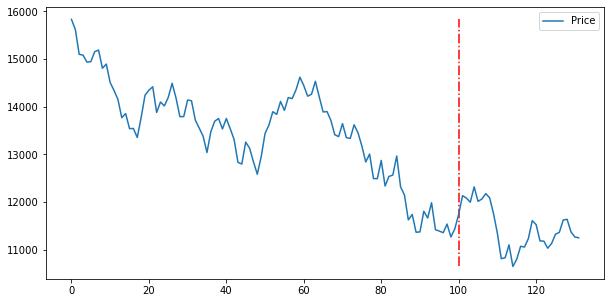

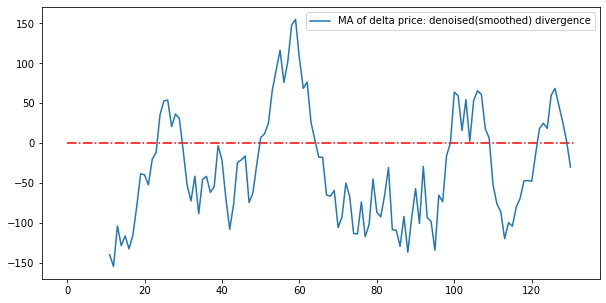

In [68]:
# 1d, ma
# 6mo as your span, trade everyday
freq = '1d'
end_date= today
price_data,  return2, long_ret, short_ret, diver_data = strategy_ma(long_sell_thres=10, long_thres = 8, short_sell_thres=4, short_thres = 2, sf1=12, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = freq, start = '2022-01-01', end=end_date, which='Close' , if_plot=True, focal_row_nums=[100], can_short=True)

print("total return in testing period: ", return2)
print(long_ret, short_ret)

total return in testing period:  2.6438045421049887
1.1737310363119253 2.2524790265513466


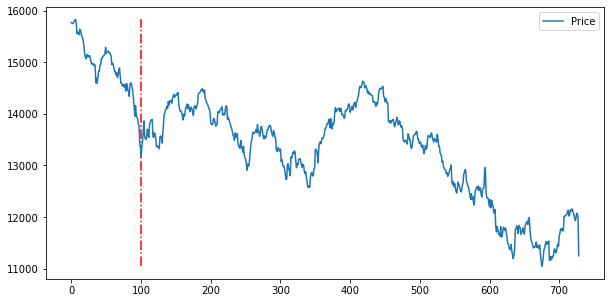

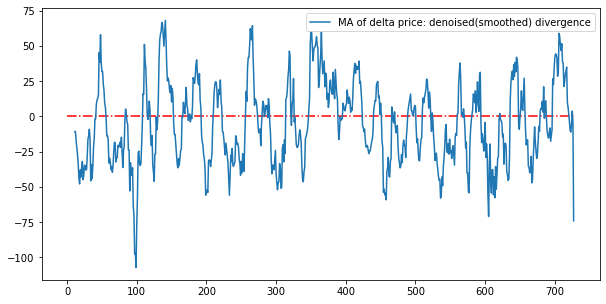

In [69]:
# 1h, ma
# 6mo as your span, trade everyday
price_data,  return2, long_ret, short_ret, diver_data = strategy_ma(long_sell_thres=10, long_thres = 8, short_sell_thres=4, short_thres = 2, sf1=12, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = '1h', start = '2022-01-01', end='2022-06-02', which='Close' , if_plot=True, focal_row_nums=[100], can_short=True)

print("total return in testing period: ", return2)
print(long_ret, short_ret)

- if use EMA (larger fluctuation vs MA), no need to buy long
  - or use MA for "long-term inverse" signal
  - EMA for "long-term following" signal?

- not no need to buy.... it is like: "if long is very strong, just hold 1 time stamp"

long return =  2.151578623629111
short return =  0.8539184419410644
total return in testing period:  1.8372726660030698
2.151578623629111 0.8539184419410644


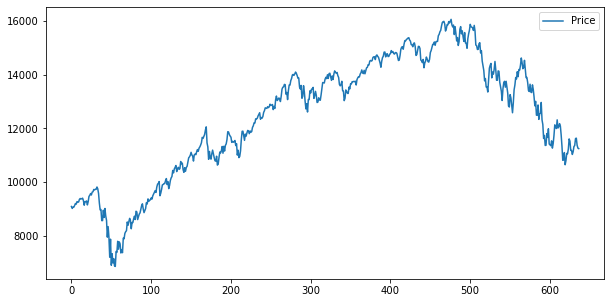

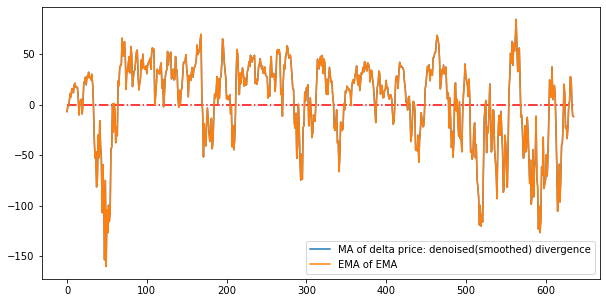

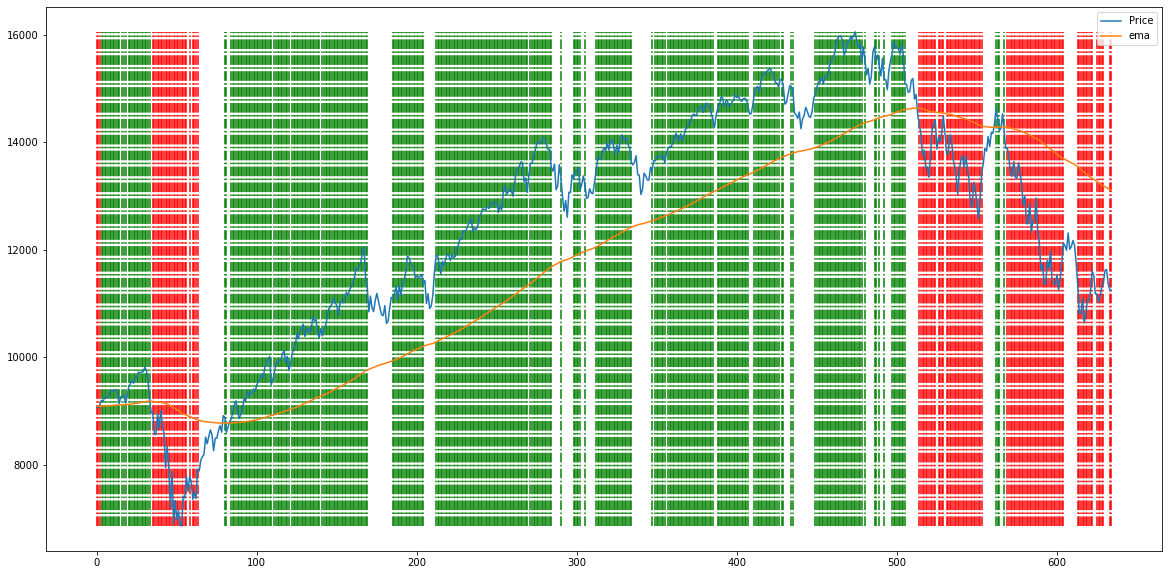

In [70]:
# 1d, ema
# 6mo as your span, trade everyday
start_date = '2020-01-01'
end_date = today
freq = '1d'
sf1 = 20
ema_sf=200
short_ticker = 'SQQQ'
long_ticker = 'TQQQ'

price_data, return2, long_ret, short_ret, diver_data = strategy_ema(ema_sf=ema_sf, long_sell_thres=0, long_thres = 0, short_sell_thres=0, short_thres = 0, sf1=sf1, sf2=1, short_ticker=short_ticker, long_ticker=long_ticker, signal_ticker="^IXIC", data_inverval = freq , start = start_date, end=end_date, which='Close' , if_plot=True, focal_row_nums=[], can_short=True)

print("total return in testing period: ", return2)
print(long_ret, short_ret)

long return =  1.06350529181761
short return =  2.039007126293995
total return in testing period:  2.1684948688674814
1.06350529181761 2.039007126293995


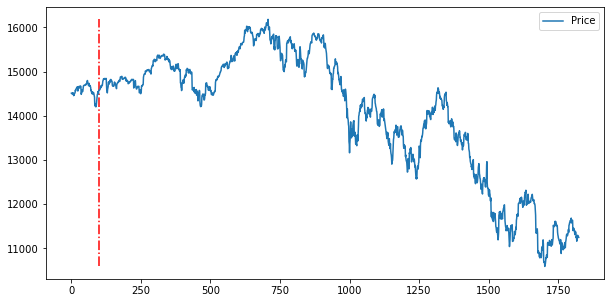

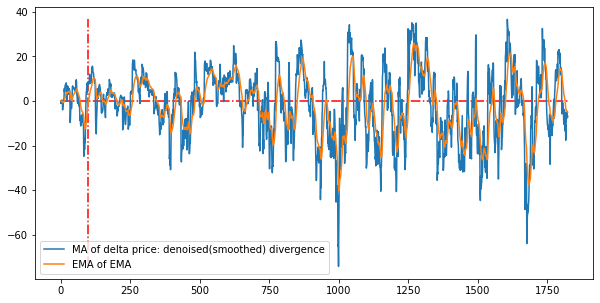

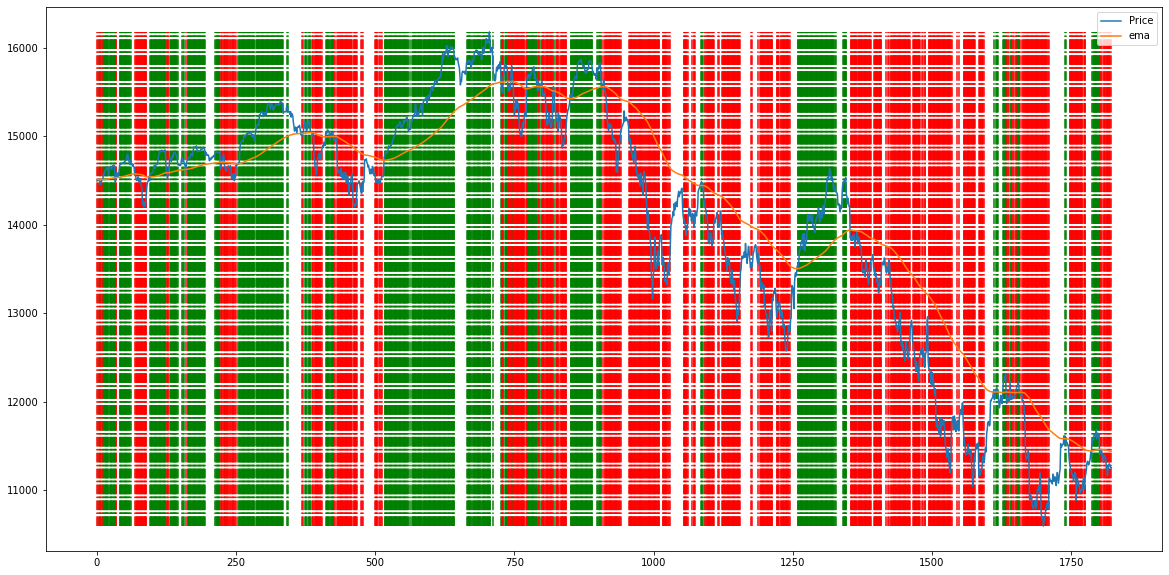

In [71]:
# 1h, ema
# 6mo as your span, trade everyday
sf1=26 # 
sf2 = 20 # 
ema_sf = 200
start_date = '2021-06-30'
end_date= today
short_ticker = 'SQQQ'
long_ticker= 'TQQQ'

price_data,  return2, long_ret, short_ret, diver_data = strategy_ema(ema_sf=ema_sf, long_sell_thres=1, long_thres = 0, short_sell_thres=6, short_thres = 0, sf1=sf1, sf2=sf2, short_ticker=short_ticker, long_ticker=long_ticker, signal_ticker="^IXIC", data_inverval = '1h', start =  start_date, end=end_date, which='Close' , if_plot=True, focal_row_nums=[100], can_short=True)

print("total return in testing period: ", return2)
print(long_ret, short_ret)

long return =  1.0
short return =  1.070580824062712
total return in testing period: 1.07
long ret 1.00 short ret 1.07


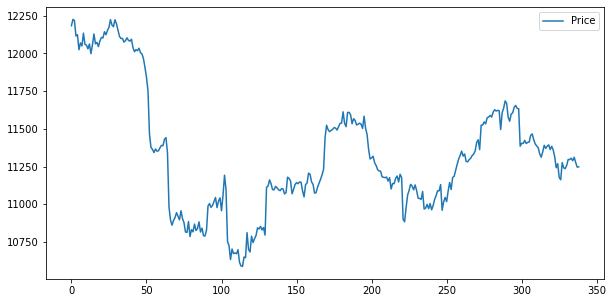

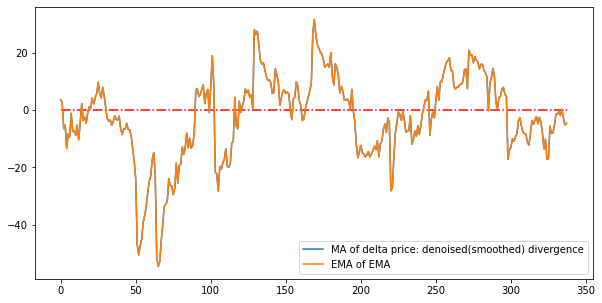

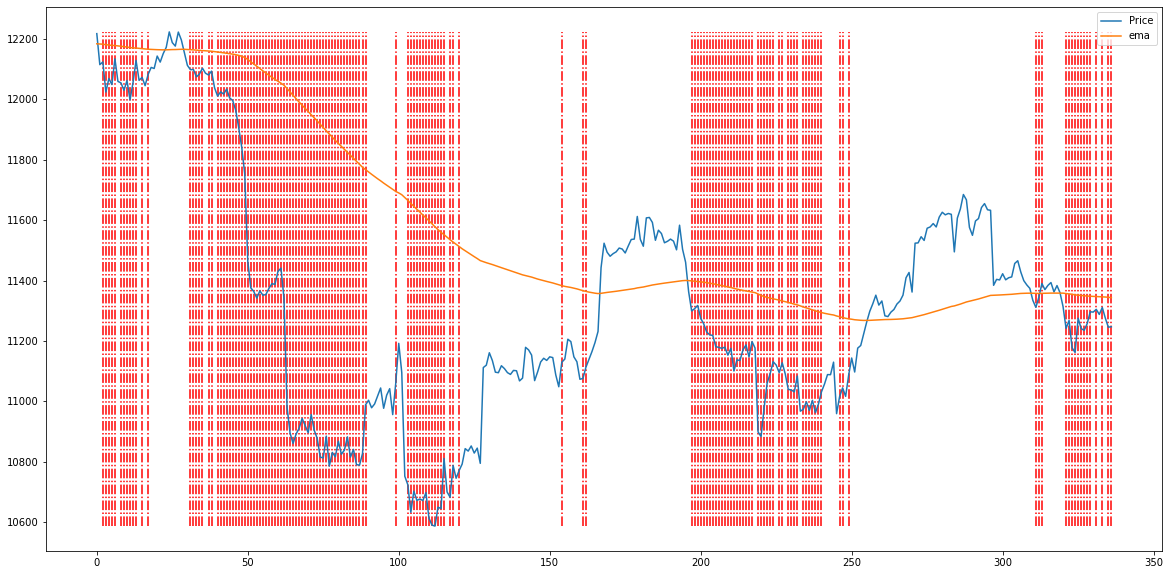

In [72]:
# 30m, ema
# 2mo as your span, trade everyday

start_date = '2022-06-05'
end_date = today
freq = '30m'
sf1=22
price_data,  ret, ret_l, ret_s, diver_data = strategy_ema(long_sell_thres=1000, long_thres = 1000, short_sell_thres=3, short_thres = 0, sf1=sf1, sf2=1, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval =freq, start = start_date, end=end_date, which='Close' , if_plot=True, focal_row_nums=[], can_short=True)

print("total return in testing period: {:.2f}".format(ret))
print("long ret {:.2f}".format(round(ret_l, 2)), "short ret {:.2f}".format(round(ret_s,2)))

long return =  1.0
short return =  0.997307796062146
total return in testing period: 1.00
long ret 1.00 short ret 1.00


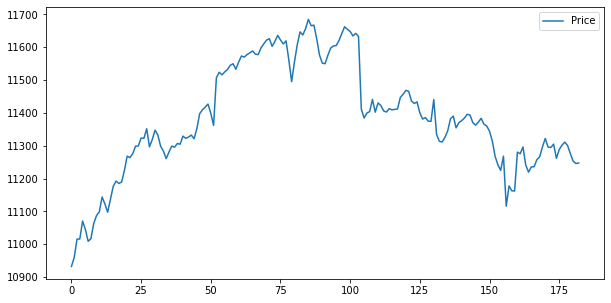

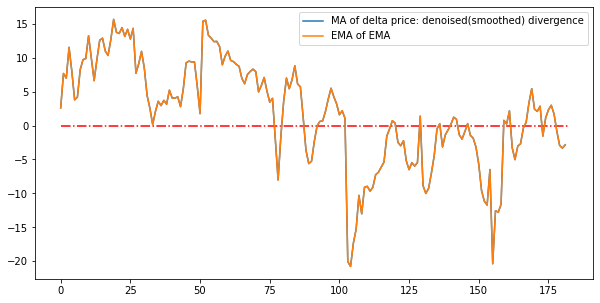

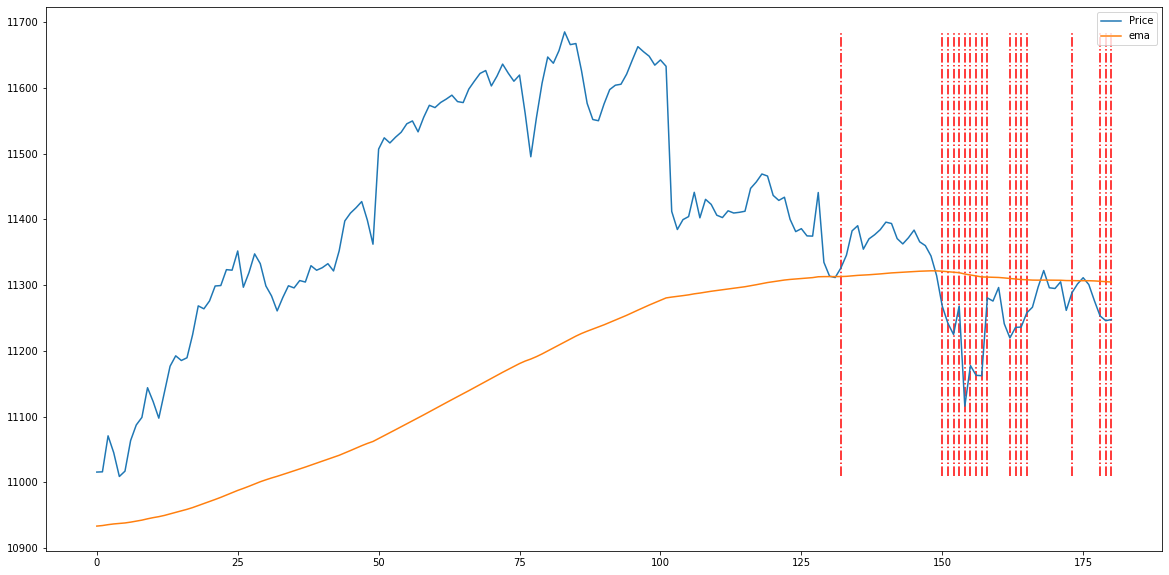

In [73]:
# 15m, ema
# 6mo as your span, trade everyday

start_date = '2022-07-05'
end_date = today
freq = '15m'
sf1=20
price_data,  ret, ret_l, ret_s, diver_data = strategy_ema(long_sell_thres=1000, long_thres = 1000, short_sell_thres=2, short_thres = 0, sf1=sf1, sf2=1, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval =freq, start = start_date, end=end_date, which='Close' , if_plot=True, focal_row_nums=[], can_short=True)

print("total return in testing period: {:.2f}".format(ret))
print("long ret {:.2f}".format(round(ret_l, 2)), "short ret {:.2f}".format(round(ret_s,2)))

long return =  1.031657074834191
short return =  1.0755677971541613
total return in testing period:  1.1096171273979165
1.031657074834191 1.0755677971541613


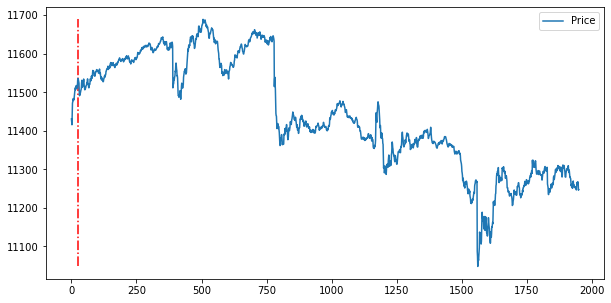

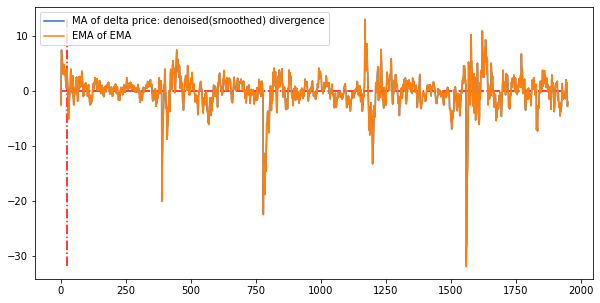

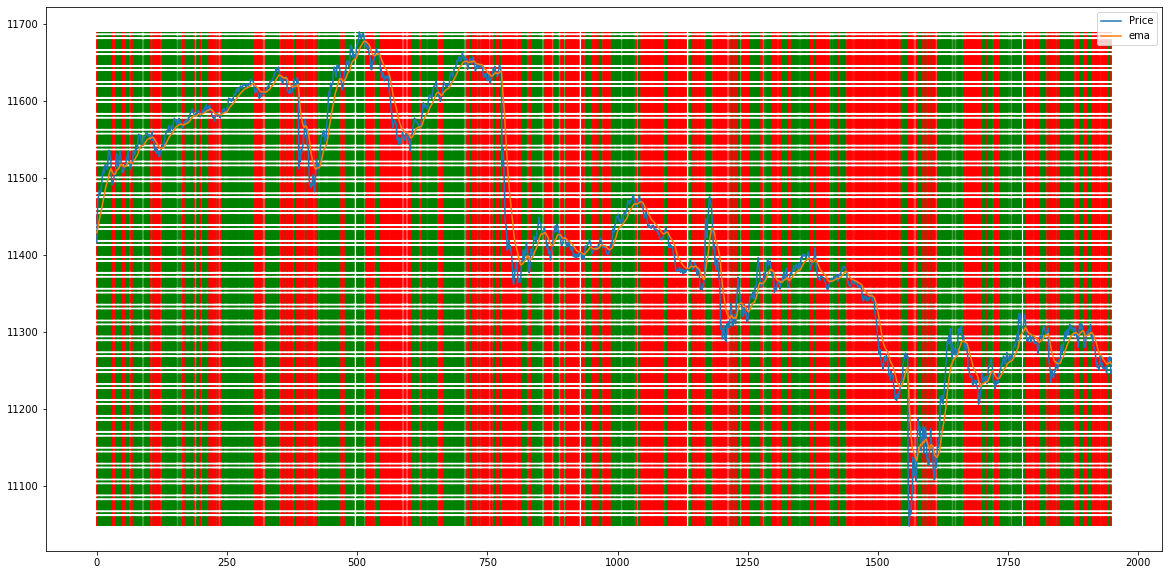

In [82]:
# 1m, ema
# 6mo as your span, trade everyday
freq = '1m'
start_date = '2022-07-07'#['2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29']
end_date = today #['2022-06-01','2022-06-01','2022-06-01','2022-06-01'] 
sf1=10

# nasdaq[which],  return_total, np.exp(return_long), np.exp(return_short), diver
price_data, return2, long_ret, short_ret, diver_data, long_data, short_data, long_sig, short_sig = strategy_ema(ema_sf=20, long_sell_thres=0, long_thres = 0, short_sell_thres = 0, short_thres = 0, sf1=sf1, sf2=1, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = freq, start = start_date, end=end_date, which='Close' , if_plot=True, focal_row_nums=[24], can_short=True)

print("total return in testing period: ", return2)
print(long_ret, short_ret)

In [88]:
np.exp(np.array(long_data['log_ret'][2:]).dot(np.array(long_sig)))

1.031657074834191

In [89]:
np.exp(np.array(short_data['log_ret'][2:]).dot(np.array(short_sig)))

1.0755677971541613

total return in testing period:  1.0415884405499147
1.0245592943463429 1.0166209474625247


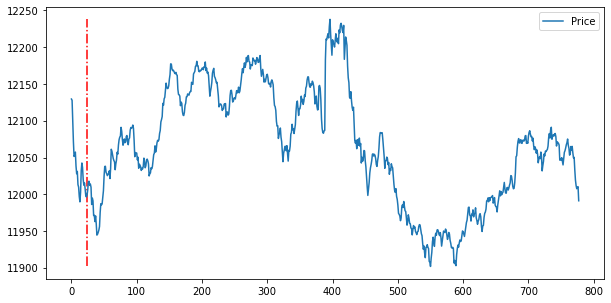

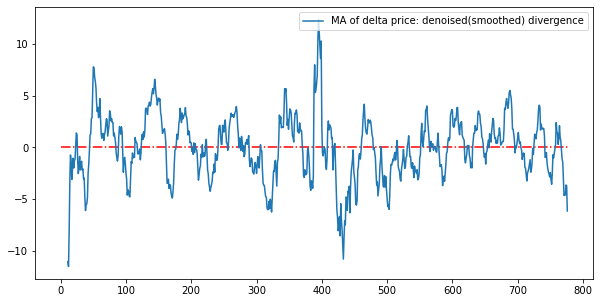

In [24]:
# 1m, ma
# 6mo as your span, trade everyday
freq = '1m'
price_data, return2, long_ret, short_ret, diver_data = strategy_ma(long_sell_thres=2, long_thres = 0, short_sell_thres = 2, short_thres = 0, sf1=12,  short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = freq, start = '2022-05-28', end='2022-06-02', which='Close' , if_plot=True, focal_row_nums=[24], can_short=True)

print("total return in testing period: ", return2)
print(long_ret, short_ret)

In [25]:
# hyperharam search: 1h, macd

sf1s = np.arange(6, 12, 2)
sf2s = np.arange(4, 20, 2)
thres = np.arange(15, 40, 5)

In [26]:
def get_return_ema(sf1, sf2, freq):
    price_data, diver_data, return2, long_ret, short_ret = strategy_ema(long_thres = 20, short_thres = 0, sf1=sf1, sf2=sf2, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = freq, start = '2022-01-01', end='2022-06-01', which='Close' , if_plot=False, focal_row_nums=[100], can_short=True)

    #print("total return in testing period: ", return2)
    #print(long_ret, short_ret)
    return return2

In [27]:
# freq = "1h"
# results = []
# max_ret = 0
# for sf1 in sf1s:
#     for sf2 in sf2s:
#         for thre in thres:
#             try:
#                 ret = get_return_ema(sf1, sf2, thre)
#                 if ret > max_ret:
#                     max_ret = ret
#                 results.append((sf1, sf2, thres, ret))
#             except:
#                 # data load error
#                 pass
# print("max return =", max_ret)
            

In [28]:
# hyperharam search: 1h, ma
# hyperharam search: 1h, macd

sf1s = np.arange(6, 20, 2)
thres = np.arange(25, 60, 5)

def get_return_ma(sf1, sf2, freq):
    price_data, diver_data, return2, long_ret, short_ret = strategy_ema(long_thres = 20, short_thres = 0, sf1=sf1, sf2=sf2, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = freq, start = '2022-01-01', end='2022-06-01', which='Close' , if_plot=False, focal_row_nums=[100], can_short=True)

    #print("total return in testing period: ", return2)
    #print(long_ret, short_ret)
    return return2

freq = "1h"
results_ma = []
for sf1 in sf1s:
    for thre in thres:
        try:
            ret = get_return_ma(sf1, 2, thre)
        except:
            # data load error
            pass
        results_ma.append((sf1, sf2, ret))
        

X, Y = np.meshgrid(sf1, thres)
Z = get_return_ma(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('sf1')
ax.set_ylabel('thres')
ax.set_zlabel('return');

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/home/dayu/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/dayu/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dayu/anaconda3/lib/python3.9/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/home/dayu/anaconda3/lib/python3.9/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/home/dayu/anaconda3/lib/python3.9/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/home/dayu/anaconda3/lib/python3.9/site-packages/yfinance/base.py", line 166, in history
    params["interval"] = interval.lower()
AttributeError: 'numpy.int64' object has no attribute 'lower'
Excepti

In [ ]:
# # 1d
# # 6mo as your span, trade everyday
# price_data, diver_data, return2, long_sig, short_sig = strategy(long_thres = 25, short_thres = 25, sf1=12,sf2=3, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC", data_inverval = '1d', start = '2021-12-04', end='2022-05-06', which='Close' , if_plot=False, focal_row_nums=[], can_short=False)

# print("total return in testing period: ", return2)
# if long_sig[-1]==1:
#     print("now: long")
# elif short_sig[-1]==1:
#     print("now: short")
# else:
#     print("now: empty")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: shapes (104,) and (103,) not aligned: 104 (dim 0) != 103 (dim 0)

most recent date is  2022-05-20 00:00:00
most recent date is  2022-05-20 00:00:00
most recent date is  2022-05-20 00:00:00
long return =  0.908876236647905
short return =  0.49037010966262706
total return in testing period:  0.44568573983478893
now: short


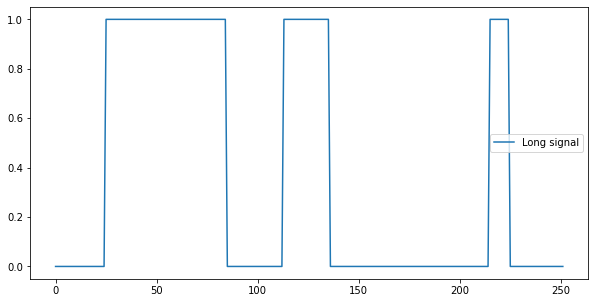

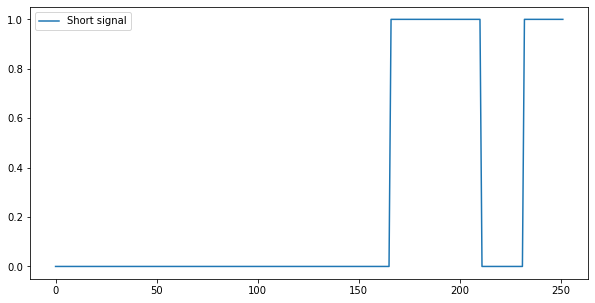

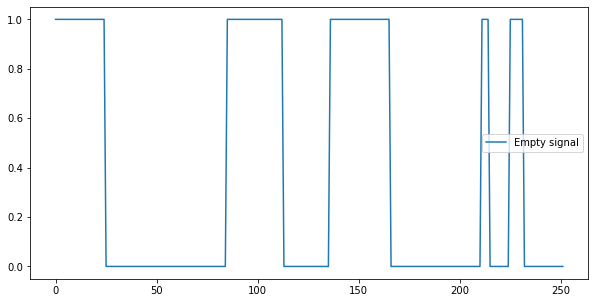

In [ ]:
# # a year as your span, trade everyday
# price_data, diver_data, return2, long_sig,short_sig = search_strategy(25, 25, '1d', 'Close','1y', 12, 4, 24, 12, True, [], True, 'SQQQ', 'TQQQ', '^IXIC')

# print("total return in testing period: ", return2)
# if long_sig[-1]==1:
#     print("now: long")
# elif short_sig[-1]==1:
#     print("now: short")
# else:
#     print("now: empty")

In [ ]:
# ## common ticker
# # shanghai: 000001.SS
# #return2, short_sig, long_sig = search_strategy2('Close','1y', 9, 2, 26, 12, True, [], True, 'SQQQ', 'TQQQ', '^IXIC')

# #return2, short_sig, long_sig = search_strategy2('Close','1y', 9, 2, 26, 12, True, [], True, 'QID', 'QLD', '^IXIC')

# # 

# # focal = '600801' 601058
# signal_from = '^IXIC'
# long_from = 'TQQQ'
# short_from = 'SQQQ'
# # data_inverval = '1d', which='Open' ,focal_period='6mo', divergence_smooth_factor = 9, delta_divergence_smooth_factor=3, long_term_p =26, short_term_p =12 , if_plot=False, focal_row_nums=[], can_short=False, short_ticker="SQQQ", long_ticker="TQQQ", signal_ticker="^IXIC"):
# #return2, short_sig, long_sig = search_strategy2('Close', '6mo', 9, 2, 26, 12, True, [], True, '000001.SS', '000001.SS', '000001.SS')
# price_data, diver_data, trades_, return2, long_sig,short_sig = search_strategy('1d','Close','1y', 9, 2, 26, 12, True, [], True, short_from, long_from, signal_from)

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
60/200

0.3